**Chapter05 | Summary**  
  
`matplotlib`과 `seaborn`을 활용해 자료를 시각화하여 기술통계만으로 알기 힘든 패턴과 이상한 점을 찾아낸다  
  
* Contents🔍  
    1. 단일 연속변수의 분포 조사 : 히스토그램
    2. 단일 연속변수의 이상값 조사 : 박스 플롯
    3. 특정 집합에서 예상치 못한 값 드러내기 : 그룹별 박스플롯
    4. 단일 연속변수(?의 분포, 이상값 함께 조사 : 바이올린 플롯

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use(['default']) # ‘default’, ‘dark_background’, ‘classic’, ‘ggplot’, ‘seaborn’

In [2]:
landtemps = pd.read_csv('data/landtemps2019avgs.csv')
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)

# histograms
단일 변수가 어떻게 분포하는지 시각화해주는 도구

## [temperature] **Histogram**

In [3]:
landtemps.shape

(12095, 7)

In [4]:
landtemps.head(3)

,locationid,station,countryid,country,latabs,elevation,avgtemp
0,AE000041196,SHARJAH_INTER_AIRP,AE,United Arab Emirates,25.333,34.0,28.251667
1,AEM00041194,DUBAI_INTL,AE,United Arab Emirates,25.255,10.4,29.585833
2,AEM00041217,ABU_DHABI_INTL,AE,United Arab Emirates,24.433,26.8,29.400000


In [5]:
# 1. mark some columns
landtemps[['station', 'country', 'latabs','elevation','avgtemp']].sample(10, random_state=5)

,station,country,latabs,elevation,avgtemp
3760,BJORNHOLT,Norway,60.0508,360.0,5.005000
1029,GALEAO_ANTONIO_CARLOS_JOBIM,Brazil,22.8090,8.5,25.320833
9516,LAURAL_MOUNTAIN_CALIFORNIA,United States,35.4783,1338.1,15.698333
6772,LAMBERTON_SW_EXP_STN,United States,44.2394,348.7,5.671667
1200,100_MILE_HOUSE_6NE,Canada,51.6833,928.0,4.066667
8150,MISSION_14_S,United States,43.1114,856.5,6.540833
6991,BROCKWAY_3_WSW,United States,47.2875,801.6,4.218333
10264,GILMER_TEXAS,United States,32.7017,152.4,18.587500
4745,MADRID_GETAFE,Spain,40.3000,617.0,16.350000
1056,VICTORIA_GONZALES_CS,Canada,48.0333,70.0,10.596667


In [6]:
# 2. descriptive statistics
landtemps.describe()

,latabs,elevation,avgtemp
count,12095.000000,12095.000000,12095.000000
mean,40.466791,589.330211,11.193542
std,12.611377,761.973468,8.563443
min,0.017000,-350.000000,-60.821000
25%,34.510300,78.000000,5.417917
50%,40.670300,271.300000,10.450000
75%,46.750550,817.500000,16.919583
max,90.000000,9999.000000,33.930000


In [7]:
# 왼쪽 꼬리가 길지만(-), 상당히 대칭적이며(<|0.5|) + 데이터가 다소 몰리지만(>0) 정규분포와 비슷한 정도로 분산되어 있음
landtemps.avgtemp.skew(), landtemps.avgtemp.kurtosis() 

(-0.2678382583481768, 2.1698313707061074)

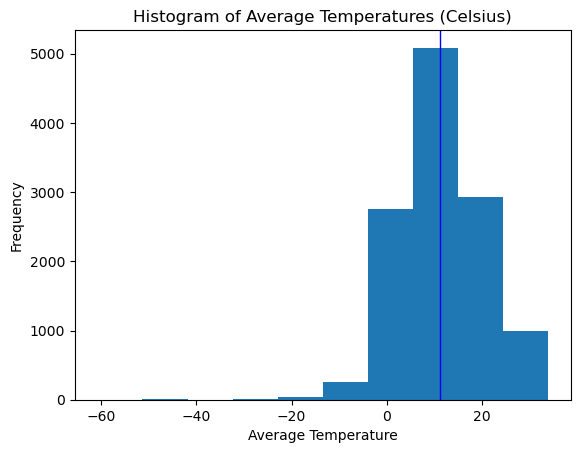

In [20]:
# 3. histogram
plt.hist(landtemps.avgtemp)
plt.axvline(landtemps.avgtemp.mean(), color='blue', linestyle='solid',linewidth=1) # linestyle : solid, dotted, dashdot, dashed 
plt.title('Histogram of Average Temperatures (Celsius)') # 평균 섭씨 온도에 대한 히스토그램
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

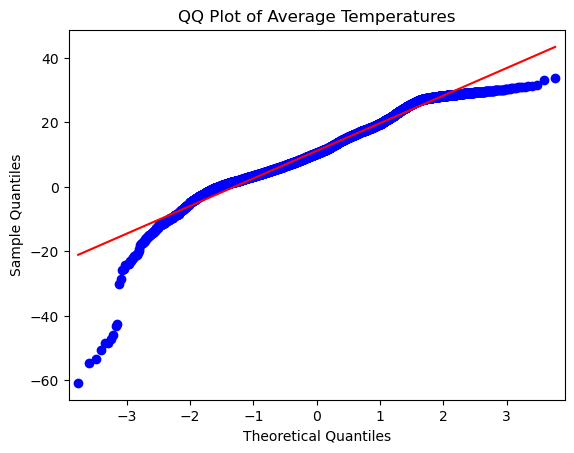

In [21]:
# 4. Q-Q plot : 분위수 - 분위수 그림으로 분포의 어디에서 정규분포를 벗어나는지 조사
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']), line='s')
plt.title('QQ Plot of Average Temperatures')
plt.show()

## [covid19] **Stack Histogram**

In [13]:
# 1. descriptive statistics
covidtotals.total_cases_pm.skew(), covidtotals.total_cases_pm.kurtosis() 
# 해석 : 오른쪽 꼬리가 긴 형태(+)로 상당히 치우쳐져있고(>|1.0|), 정규분포 대비 심하게 데이터 몰림(>0)

(4.284484653881832, 26.137524276840445)

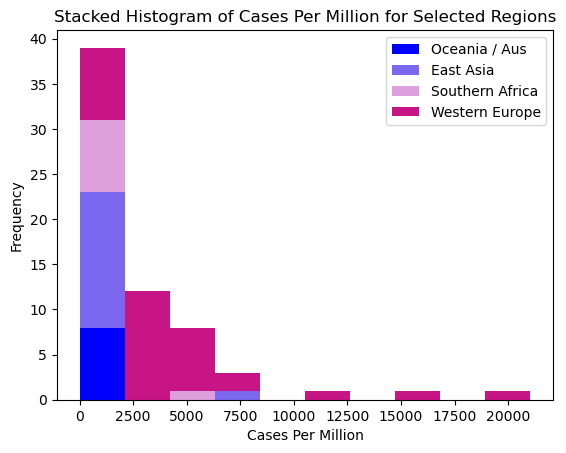

In [19]:
# 2. stack histogram
showregions = ['Oceania / Aus', 'East Asia', 'Southern Africa', 'Western Europe'] # 1) 범주 선택
def getcases(regiondesc):
    return covidtotals.loc[covidtotals.region==regiondesc, 'total_cases_pm'] # 2) 지역 내 국가들의 '백만명당 확진자 수' 시리즈를 반환하는 함수
plt.hist([getcases(k) for k in showregions], color=['blue','mediumslateblue','plum','mediumvioletred'], label=showregions, stacked=True) # 3) 스택 히스토그램
plt.title('Stacked Histogram of Cases Per Million for Selected Regions')
plt.xlabel('Cases Per Million')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 22500, step=2500)) # x축 간격 설정
plt.legend() # 범례 표시
plt.show()

## [covid19] Multiple histogram : **Subplot**

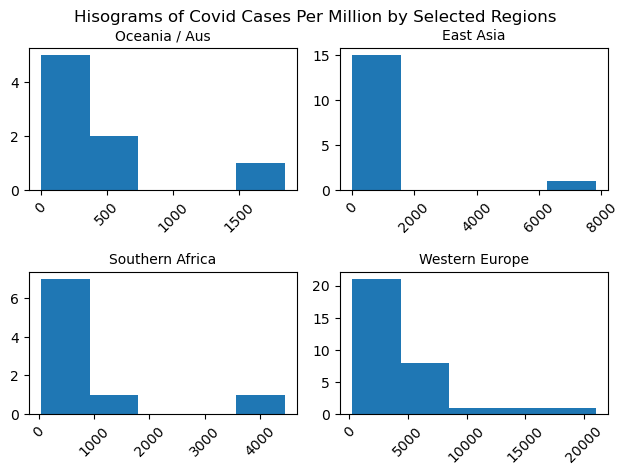

In [45]:
# 1. set options for subplot
fig, axes = plt.subplots(2, 2) # 1) 그림과 함께 4개의 축을 반환
fig.suptitle('Hisograms of Covid Cases Per Million by Selected Regions') # 2) 전체 타이틀
axes = axes.ravel() # 3) 다차원 배열을 1차원 배열로 

# 2. print histograms
# 4) 각 subplot의 축에 대해 반복문 수행 : 서로 다른 지역 선택 > 히스토그램 작성 > 각 축에 눈금 레이블 순회 > 눈금 레이블 회전
for j, ax in enumerate(axes): 
    ax.hist(covidtotals.loc[covidtotals.region==showregions[j]].total_cases_pm, bins=5)
    ax.set_title(showregions[j], fontsize=10)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout() # 5) 서브플롯 간격 자동설정
fig.subplots_adjust(top=0.90) # 6) 서브플롯 간격 특정값으로 변경
plt.show()

# boxplots

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
nls97 = pd.read_csv('data/nls97.csv')
nls97.set_index('personid', inplace=True)
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)

In [47]:
# 1-1. SAT verbal score - descriptive statistics
nls97.satverbal.describe()

count    1406.000000
mean      499.724040
std       112.166256
min        14.000000
25%       430.000000
50%       500.000000
75%       570.000000
max       800.000000
Name: satverbal, dtype: float64

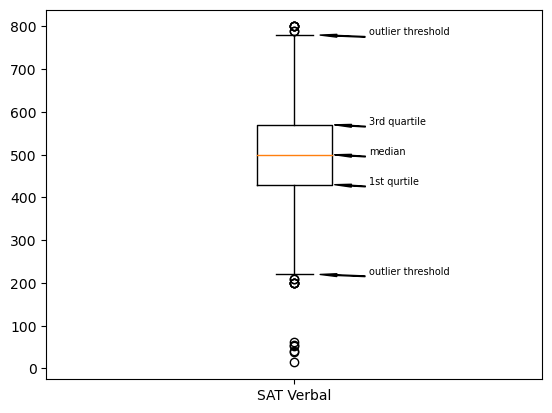

In [60]:
# 1-2. SAT verbal score - boxplot
plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])
# xy는 화살표가 가리키는 지점, xytext는 텍스트 시작지점
plt.annotate('outlier threshold', xy=(1.05,780), xytext=(1.15,780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,570), xytext=(1.15,570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,500), xytext=(1.15,500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st qurtile', xy=(1.08,430), xytext=(1.15,430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('outlier threshold', xy=(1.05,220), xytext=(1.15,220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.show()

In [61]:
# 2-1. worked weeks - descriptive statistics
weeksworked = nls97.loc[:, ['highestdegree','weeksworked16','weeksworked17']]
weeksworked.describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


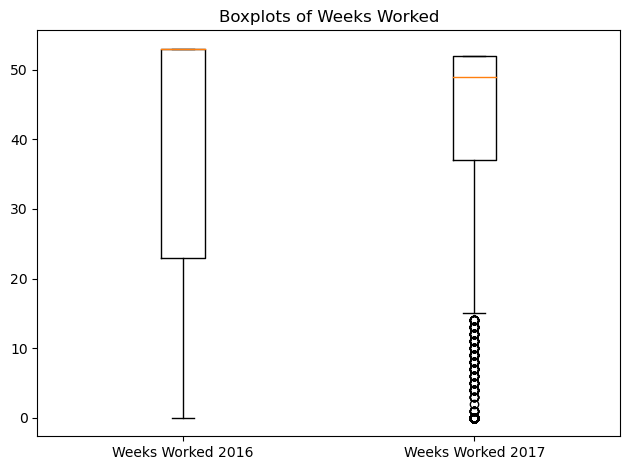

In [62]:
# 2-2. worked weeks - boxplot
plt.boxplot([weeksworked.weeksworked16.dropna(), weeksworked.weeksworked17.dropna()],\
           labels=['Weeks Worked 2016', 'Weeks Worked 2017'])
plt.title('Boxplots of Weeks Worked')
plt.tight_layout()
plt.show()

# grouped boxplots

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nls97 = pd.read_csv('data/nls97.csv')
nls97.set_index('personid', inplace=True)
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)

## [LS97] **Grouped boxplot**

In [73]:
# 1. descriptive statistics : 최종 학력별 기술통계량
def gettots(x): # 1) Series 반환하는 함수 정의
    out = {}
    out['min'] = x.min()
    out['qr1'] = x.quantile(0.25)
    out['med'] = x.median()
    out['qr3'] = x.quantile(0.75)
    out['max'] = x.max()
    out['count'] = x.count()
    return pd.Series(out)

# 2) .apply로 각 그룹에 대해 함수 호출
nls97.groupby(['highestdegree'])['weeksworked17'].apply(gettots).unstack() # .unstack()는 옆으로 쌓이게 해줌

,min,qr1,med,qr3,max,count
highestdegree,,,,,,
0. None,0.0,0.0,40.0,52.0,52.0,510.0
1. GED,0.0,8.0,47.0,52.0,52.0,848.0
2. High School,0.0,31.0,49.0,52.0,52.0,2665.0
3. Associates,0.0,42.0,49.0,52.0,52.0,593.0
4. Bachelors,0.0,45.0,50.0,52.0,52.0,1342.0
5. Masters,0.0,46.0,50.0,52.0,52.0,538.0
6. PhD,0.0,46.5,50.0,52.0,52.0,51.0
7. Professional,0.0,47.0,50.0,52.0,52.0,97.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


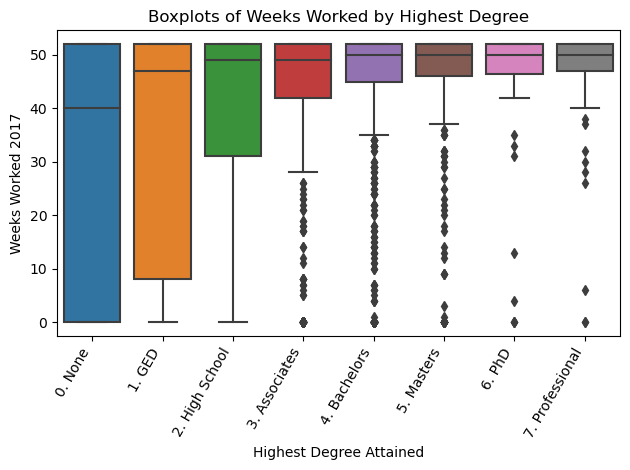

In [74]:
# 2. boxplots for weeks worked by highest degree
# - seaborn을 사용하여 하나의 변수에 있는 고유값들별로 박스플롯을 볼 수 있다
myplt = sns.boxplot('highestdegree', 'weeksworked17', data=nls97, order=sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title('Boxplots of Weeks Worked by Highest Degree')
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.tight_layout()
plt.show()

## [covid19] **Grouped boxplot + swarm plot**

In [78]:
# 1. descriptive statistics
covidtotals.groupby(['region'])['total_cases_pm'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
region,,,,,,
Caribbean,95.035,251.51850,339.0095,1726.15975,4435.327,22.0
Central Africa,14.696,71.09900,367.5180,1538.36600,3317.196,11.0
Central America,93.053,924.54750,1447.8430,2190.56500,10274.481,7.0
Central Asia,373.866,918.89625,1974.4910,2906.75950,10593.831,6.0
East Africa,8.521,65.41800,190.1960,268.91700,5015.172,13.0
East Asia,2.611,15.98500,64.6315,269.34525,7825.695,16.0
Eastern Europe,346.726,882.72775,1189.8350,2317.46025,6854.143,22.0
North Africa,105.342,202.14600,421.0720,426.71700,793.067,5.0
North America,2290.093,2566.99750,2843.9020,6327.77900,9811.656,3.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases_pm', ylabel='region'>

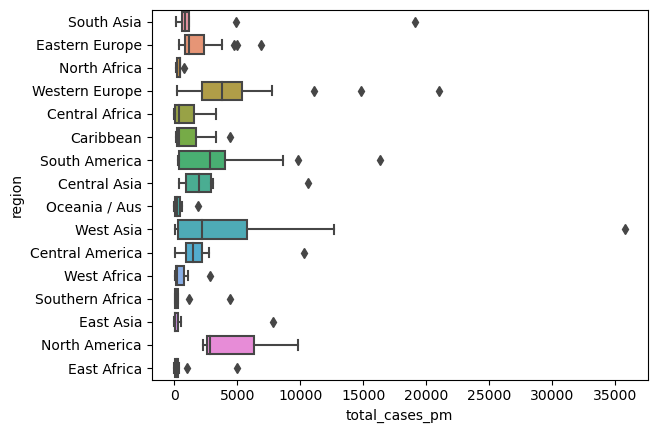

In [79]:
# 2. boxplot
sns.boxplot('total_cases_pm', 'region', data=covidtotals)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='total_cases_pm', ylabel='region'>

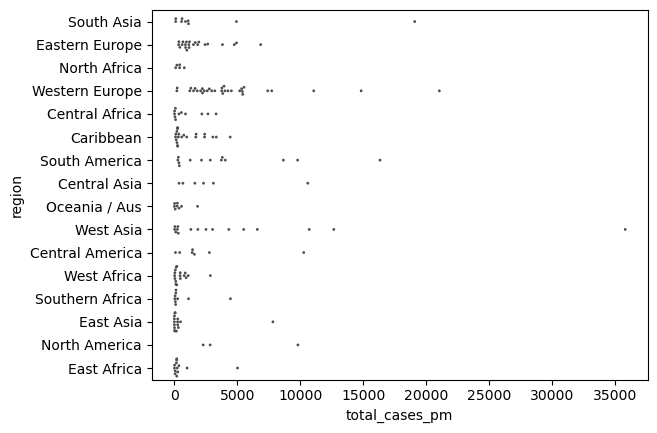

In [81]:
# 3. swarm plot
# - 각 지역에 대해 한 국가마다 점이 표시됨
sns.swarmplot(y='region', x='total_cases_pm', data=covidtotals, size=2, color='.3', linewidth=0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:

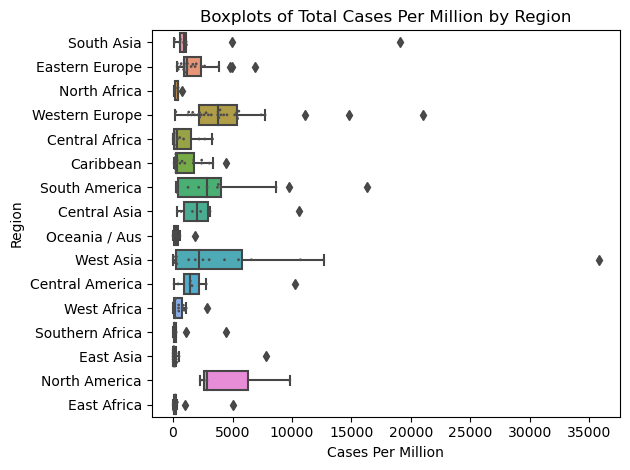

In [82]:
# 4. box + swarm plot
sns.boxplot('total_cases_pm', 'region', data=covidtotals)
sns.swarmplot(y='region', x='total_cases_pm', data=covidtotals, size=2, color='.3', linewidth=0) # '지역별 국가 수'에 대한 감을 잡기위해 사용
plt.title('Boxplots of Total Cases Per Million by Region')
plt.xlabel('Cases Per Million')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# violin plots
* 바이올린 플롯 = 박스플롯 + 히스토그램
* 바비올린 플롯에는 **사분위범위, 중앙값, 라인**과 함께 **모든 값 범위의 관측빈도**가 표현됨

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
nls97 = pd.read_csv('data/nls97.csv')
nls97.set_index('personid', inplace=True)
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)

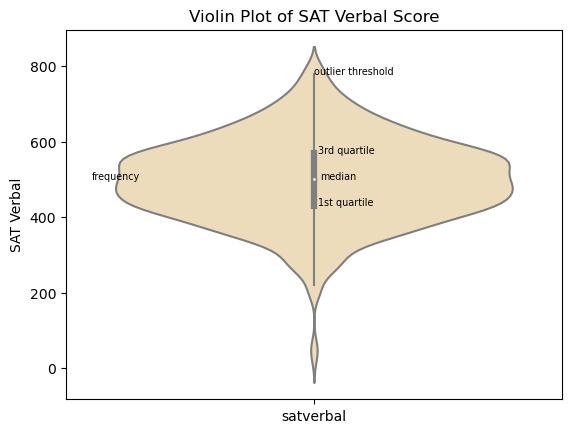

In [99]:
sns.violinplot(data=nls97.loc[:, ['satverbal']], color='wheat', orient='v')
# 참고 ) sns.violinplot(nls97.satverbal, color='wheat', orient='v') > 이렇게 데이터를 불러오면 orient 파라미터 적용이 안됨
plt.title('Violin Plot of SAT Verbal Score')
plt.ylabel('SAT Verbal')
plt.text(0.08, 780, 'outlier threshold', horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.75), '3rd quartile', horizontalalignment='center', size='x-small')
plt.text(0.05, nls97.satverbal.median(), 'median', horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.25), '1st quartile', horizontalalignment='center', size='x-small')
plt.text(-0.4, 500, 'frequency', horizontalalignment='center', size='x-small')
plt.show()

In [100]:
# 2. weeks worked - descriptives
nls97.loc[:, ['weeksworked16', 'weeksworked17']].describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


아래와 같이 **객체지향 접근 방식**을 활용하면, 축의 attribute를 쉽게 다룰 수 있다.

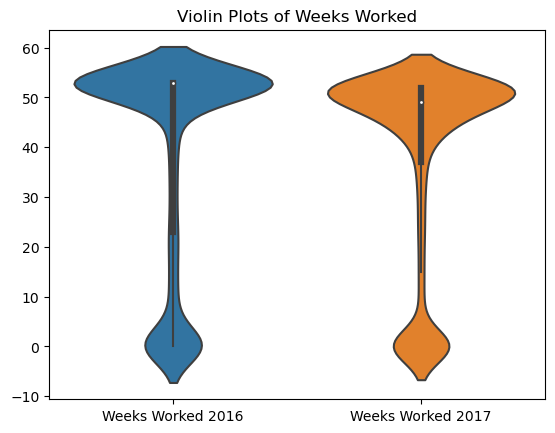

In [101]:
# 2. weeks worked - violin plot
myplt = sns.violinplot(data=nls97.loc[:, ['weeksworked16', 'weeksworked17']])
myplt.set_title('Violin Plots of Weeks Worked')
myplt.set_xticklabels(['Weeks Worked 2016', 'Weeks Worked 2017'])
plt.show()
# 결과 해석 
# : weekworked 분포는 bimodal(이봉)을 이루며 분포의 상단, 하단이 불룩한 모습
# : 2016년, 2017년 사분위범위는 차이가 크다

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


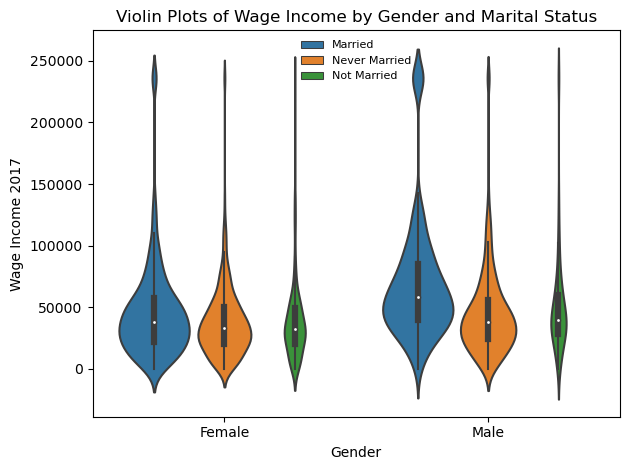

In [103]:
# 3.wage income by gender - violin plot
# 1) 결혼 상태를 세 가지로 간소화
nls97['maritalstatuscollapsed'] = nls97.maritalstatus.\
                                  replace(['Married','Never-married','Divorced','Separated','Widowed'],\
                                          ['Married','Never Married','Not Married','Not Married','Not Married']) 
# 2) x축에 성별, y축에 급여, hue에 결혼 상태 
# 3) scale='count'는 범주별 관측 수에 따라 플롯의 크기가 달라지게 만듦
sns.violinplot(nls97.gender, nls97.wageincome, hue=nls97.maritalstatuscollapsed, scale='count') 
plt.title('Violin Plots of Wage Income by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Wage Income 2017')
plt.legend(title='', loc='upper center', framealpha=0, fontsize=8)
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


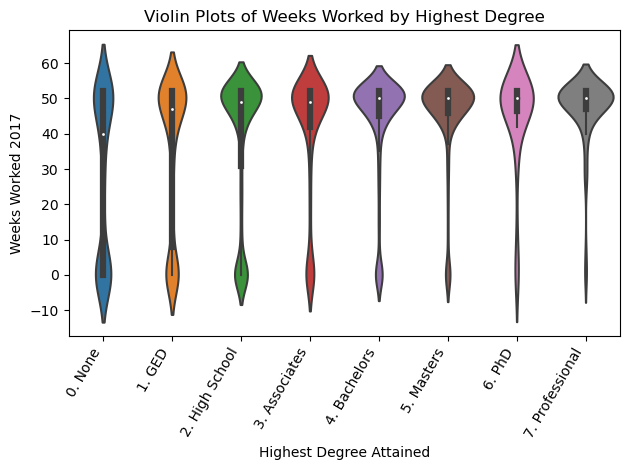

In [104]:
# 4. weeks worked by degree attainment - violin plot
nls97 = nls97.sort_values(['highestdegree'])
myplt = sns.violinplot('highestdegree','weeksworked17', data=nls97)
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
myplt.set_title('Violin Plots of Weeks Worked by Highest Degree')
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
plt.tight_layout()
plt.show()